# Construccion de un Clasificador

## Presentacion del problema

Una de las mayores perdidas de una compañia de seguros estan representadas por las polizas que aun dadas de alta, no pueden cobrar ninguna de sus cuotas en los primeros tres meses de vigencia, motivo por el cual inmediatamente la misma se anula.

Esto se conoce dentro del rubro como <b>Lapse 90</b>

El objetivo de este trabajo, es encontrar un modelo que prediga la probabilidad de que una poliza caiga dentro de esta clasificacion, con el objetivo de poder realizar alguna accion preventiva, evitando que la poliza se anule.

## Armado del dataset

En base a los datos presentes en la compañia, se genero una muestra representativa de una dataset de todas las polizas vigentes, y aquellas que fueron anuladas por Lapse 90.
La muestra comprende 300.000 polizas del canal comercial Tarjeta Naranja.

Se adjunta el codigo SQL utilizado para generar el dataset, y la muestra aleatoria del mismo.

# Repositorio

Todos los archivos necesarios se encuentra en el siguiente repositorio de github:

https://github.com/raharari/Desafio-3

# EDA

In [2]:
# Importamos las librerias basicas de python

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Guardamos el path del archivo en una variable para despues cargarlo en un df

file = 'C:/Users/Ramiro/Desktop/Digital House/Desafios/Desafio 3/Churn Naranja Muestra.csv'

#file = 'C:/Users/rharari/Desktop/Data Science/Desafio 3/Churn Naranja Muestra.csv'

# Creamos un DataFrame con la info del csv
df = pd.read_csv(file, sep='\t', encoding='ANSI')

In [4]:
#Veamos algunos datos del dataset

df.head()

,Solicitud_Contrato,npoliza,ncertificado,ncproducto,Producto,Ramo,Estado,Premio,Producto_Masivo,Lapse_90,cdocumento,cdSexo,Edad,cdProvincia,Medio_Venta_H,Punto_Venta_H,Puesto_Venta_H,Rentabilidad,Segmento
0,232-405557-2407376,405557,2407376,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Vigente,30.81,1,0,30900513,Masculino,34,Cordoba,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q3,Tx Con Financ.
1,301-100618-390797,100618,390797,301,SVC Tarjetas con Cl Ajuste,Vida Colectivo,Vigente,36.03,1,0,33920078,Femenino,30,Rio Negro,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q1,Completos
2,304-100723-73514,100723,73514,304,SVC T.Naranja Todos Venden,Vida Colectivo,Vigente,62.00,0,0,26459882,Femenino,40,Santiago del Estero,Sucursales (MV),FV Socio (PunV),Todos Venden (PueV),Q3,Completos
3,232-405557-2355690,405557,2355690,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Vigente,37.19,1,0,17794433,Femenino,52,Santa Fe,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q2,Completos
4,232-405557-1165633,405557,1165633,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Vigente,36.04,1,0,30851203,Masculino,34,Santa Fe,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q4,Mixto Con Financ.Z


Podemos observar que el dataset contiene datos relacionados a la poliza en si, y datos referentes al cliente titular de cada poliza.
Asimismo, notamos que cada poliza es una observacion dentro del dataframe.

In [5]:
#Veamos un poco como esta compuesto el dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
Solicitud_Contrato    300000 non-null object
npoliza               300000 non-null int64
ncertificado          300000 non-null int64
ncproducto            300000 non-null int64
Producto              300000 non-null object
Ramo                  300000 non-null object
Estado                300000 non-null object
Premio                300000 non-null float64
Producto_Masivo       300000 non-null int64
Lapse_90              300000 non-null int64
cdocumento            300000 non-null int64
cdSexo                300000 non-null object
Edad                  300000 non-null int64
cdProvincia           300000 non-null object
Medio_Venta_H         300000 non-null object
Punto_Venta_H         300000 non-null object
Puesto_Venta_H        300000 non-null object
Rentabilidad          300000 non-null object
Segmento              300000 non-null object
dtypes: float64(1), int64(7), object(11)

Podemos observar que el mismo contiene 300.000 observaciones, de las cuales no hay valores nulos.

Esto nos facilita trabajar con el mismo, ya que evita que tengamos que hacer una limpieza masiva de datos, o manipularlo demasiado previamente.

In [6]:
# Veamos algunos estadisticos del DF

df.describe()

,npoliza,ncertificado,ncproducto,Premio,Producto_Masivo,Lapse_90,cdocumento,Edad
count,3.000000e+05,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000
mean,3.900621e+05,7.490415e+05,718.156773,62.643175,0.648740,0.250257,2.366718e+07,48.731377
std,3.614091e+05,8.300180e+05,951.141196,65.181655,0.477365,0.433162,1.672111e+07,14.608773
min,1.350000e+02,0.000000e+00,152.000000,-678.100000,0.000000,0.000000,3.934510e+05,1.000000
25%,1.007230e+05,3.727325e+04,232.000000,36.030000,0.000000,0.000000,1.315505e+07,37.000000
50%,4.055570e+05,3.667800e+05,245.000000,37.190000,1.000000,0.000000,2.161361e+07,49.000000
75%,4.055570e+05,1.308853e+06,304.000000,72.897500,1.000000,1.000000,2.985966e+07,60.000000
max,1.953280e+06,2.742126e+06,5900.000000,2415.000000,1.000000,1.000000,9.571337e+07,118.000000


Notamos que hay polizas con premios negativos, seguramente por errores de carga.

In [7]:
df[df['Premio']<0]

,Solicitud_Contrato,npoliza,ncertificado,ncproducto,Producto,Ramo,Estado,Premio,Producto_Masivo,Lapse_90,cdocumento,cdSexo,Edad,cdProvincia,Medio_Venta_H,Punto_Venta_H,Puesto_Venta_H,Rentabilidad,Segmento
30877,232-405557-2535161,405557,2535161,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-30.81,1,1,14459770,Masculino,57,Corrientes,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q5,Tx Con Financ.
33049,304-100723-226275,100723,226275,304,SVC T.Naranja Todos Venden,Vida Colectivo,Anulada,-62.00,0,1,26551328,Masculino,40,Rio Negro,Sucursales (MV),FV Socio (PunV),Todos Venden (PueV),Q4,Mixto Con Financ.Z
58591,232-405557-2418095,405557,2418095,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-30.81,1,1,14660462,Masculino,56,Tucuman,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q5,Tx Sin Financ.
61872,304-100723-178819,100723,178819,304,SVC T.Naranja Todos Venden,Vida Colectivo,Anulada,-62.00,0,1,35650450,Femenino,27,Santa Fe,Sucursales (MV),FV Socio (PunV),Todos Venden (PueV),Q2,Mixto Con Financ.Z
67492,232-405557-2483729,405557,2483729,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-30.81,1,1,18268033,Femenino,52,Buenos Aires,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q5,Sin Segmento
96355,232-405557-2324087,405557,2324087,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-22.75,1,1,29340183,Masculino,36,Santiago del Estero,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q2,Tx Con Financ.
97859,3075-102903-155263,102903,155263,3075,Seguro de Compra T.Naranja,Riesgos Varios,Anulada,-125.00,0,1,5332990,Femenino,67,Dato Erroneo,Telemarketing (MV),Externo (PunV),Deelo IN (PueV),Q5,Esporadico
103604,232-405557-2238792,405557,2238792,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-22.75,1,1,39169302,Femenino,22,Buenos Aires,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q4,Completos
109046,241-1221298-0,1221298,0,241,AP Capital Uni. Amer. Assist,Accidentes Personales,Anulada,-222.16,0,1,10146252,Masculino,66,Chubut,Telemarketing (MV),Externo (PunV),PyD (PueV),Q5,Mixto
128276,2045-1849613-0,1849613,0,2045,SH PLUS Tarjetas Regionales,Combinado Familiar,Anulada,-364.77,0,1,27149634,Femenino,39,Santa Fe,Telemarketing (MV),Externo (PunV),DDM (PueV),Q3,Mixto


Por el conocimiento que tenemos del negocio, notamos que los montos de los premios son coherentes, por lo cual vamos a invertir el signo de los mismos para arreglar la feature.

In [8]:
df.loc[df['Premio']<0,'Premio'] = -df.loc[df['Premio']<0,'Premio']

In [9]:
#Verificamos que haya quedado corregido

df.describe()

,npoliza,ncertificado,ncproducto,Premio,Producto_Masivo,Lapse_90,cdocumento,Edad
count,3.000000e+05,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000
mean,3.900621e+05,7.490415e+05,718.156773,62.659253,0.648740,0.250257,2.366718e+07,48.731377
std,3.614091e+05,8.300180e+05,951.141196,65.166200,0.477365,0.433162,1.672111e+07,14.608773
min,1.350000e+02,0.000000e+00,152.000000,0.000000,0.000000,0.000000,3.934510e+05,1.000000
25%,1.007230e+05,3.727325e+04,232.000000,36.030000,0.000000,0.000000,1.315505e+07,37.000000
50%,4.055570e+05,3.667800e+05,245.000000,37.190000,1.000000,0.000000,2.161361e+07,49.000000
75%,4.055570e+05,1.308853e+06,304.000000,72.920000,1.000000,1.000000,2.985966e+07,60.000000
max,1.953280e+06,2.742126e+06,5900.000000,2415.000000,1.000000,1.000000,9.571337e+07,118.000000


Vemos por otro lado que el campo Edad presenta algunos problemas, ya que hay edades muy bajas (1 año) o muy altas (118)
Sabemos que ningun menor de 18 puede aquirir una poliza por politicas de la compañia. Asimismo, la edad de permanencia maxima para es 89 años.

Los valores que queden fuera de ese rango los consideraremos outliers, y los eliminaremos del analisis

In [10]:
#Nulleamos esos valores
df.loc[df['Edad']>89, 'Edad'] = np.nan
df.loc[df['Edad']<18, 'Edad'] = np.nan

In [11]:
#Dropeamos los nulos del df
df = df.dropna()

### Veamos como estan completas las columnas de Provincia y Sexo

In [12]:
df['cdSexo'].value_counts()

Femenino         168895
Masculino        130547
No informado        100
Indeterminado         7
Name: cdSexo, dtype: int64

In [13]:
df['cdProvincia'].value_counts()

Buenos Aires                      57402
Dato Erroneo                      52415
Cordoba                           35213
Santa Fe                          20407
Tucuman                           19047
Chaco                             13483
Corrientes                        12122
Salta                             11877
Misiones                           9654
Entre Rios                         9187
Santiago del Estero                7352
Santa Cruz                         7070
Formosa                            6913
Jujuy                              5449
Neuquen                            5201
Capital Federal                    4469
Rio Negro                          4404
Catamarca                          4346
Chubut                             4052
La Rioja                           4000
San Luis                           2506
Tierra del Fuego                   1769
La Pampa                           1105
Mendoza                              63
San Juan                             42


In [14]:
#Eliminamos las observaciones con valores erroneos
df.loc[df['cdSexo'] == 'No informado', 'cdSexo'] = np.nan
df.loc[df['cdSexo'] == 'Indeterminado', 'cdSexo'] = np.nan

df.loc[df['cdProvincia'] == 'Todas', 'cdProvincia'] = np.nan
df.loc[df['cdProvincia'] == 'Dato Erroneo', 'cdProvincia'] = np.nan

In [15]:
df.loc[df['npoliza']==1004916]

,Solicitud_Contrato,npoliza,ncertificado,ncproducto,Producto,Ramo,Estado,Premio,Producto_Masivo,Lapse_90,cdocumento,cdSexo,Edad,cdProvincia,Medio_Venta_H,Punto_Venta_H,Puesto_Venta_H,Rentabilidad,Segmento
89879,245-1004916-0,1004916,0,245,AP Capital Uniforme - Sin Serv,Accidentes Personales,Anulada,129.01,0,1,22481682,Masculino,46.0,Todas,Kioscos (MV),Kioscos Esponsorizados (PunV),Kioscos Ex Zurich (PueV),Q4,Debitador


In [16]:
df.loc[df['npoliza']==1004916, 'cdProvincia'] = np.nan

In [17]:
#Verificamos que se haya corregido

df['cdSexo'].value_counts()

Femenino     168895
Masculino    130547
Name: cdSexo, dtype: int64

In [18]:
#Verificamos que se haya corregido

df['cdProvincia'].value_counts()

Buenos Aires           57402
Cordoba                35213
Santa Fe               20407
Tucuman                19047
Chaco                  13483
Corrientes             12122
Salta                  11877
Misiones                9654
Entre Rios              9187
Santiago del Estero     7352
Santa Cruz              7070
Formosa                 6913
Jujuy                   5449
Neuquen                 5201
Capital Federal         4469
Rio Negro               4404
Catamarca               4346
Chubut                  4052
La Rioja                4000
San Luis                2506
Tierra del Fuego        1769
La Pampa                1105
Mendoza                   63
San Juan                  42
Name: cdProvincia, dtype: int64

In [19]:
#Veos las observaciones con las que nos quedamos finalmente
len(df)

299549

## Arreglo del DataFrame

Para poder tener un trackeo de como predice el modelo para una poliza en particular, transformaremos la columna Solicitud Contrato (la cual es compuesta por numero de producto, numero de poliza y numero de certificado) en el indice del DataFrame.

In [20]:
df = df.set_index(df['Solicitud_Contrato'])
df = df.drop(columns='Solicitud_Contrato')

### Del mismo modo, eliminaremos las columnas redudantes o que no utilizaremos para el modelado.

Sabemos que todas las polizas vigentes tendran un estado de Lapse 90 igual a 0 y que todas las anuladas tendran un estado igual 1 por la manera en la que se armo el dataset.
Dejar esta feature al momento de modelar no tendria sentido, ya que al momento de querer hacer la prediccion todas las polizas estaran vigentes. Mas alla, la correlacion entre Lapse_90 y Estado deberia ser 1, por lo que no seria conveniente incluirla al modelar.

In [21]:
#Eliminamos las columnas que no agregan informacion al dataframe

df = df.drop(columns=['npoliza','ncertificado','ncproducto','Estado','cdocumento'])

In [22]:
#Por ultimo, renombramos algunas columnas para trabajar mas comodamente

df.rename(columns={ 'cdSexo': 'Sexo',
                    'cdProvincia': 'Provincia',
                    'Medio_Venta_H' : 'Medio_Venta',
                    'Punto_Venta_H' : 'Punto_Venta',
                    'Puesto_Venta_H' : 'Puesto_Venta'}, inplace=True)

In [23]:
df.head()

,Producto,Ramo,Premio,Producto_Masivo,Lapse_90,Sexo,Edad,Provincia,Medio_Venta,Punto_Venta,Puesto_Venta,Rentabilidad,Segmento
Solicitud_Contrato,,,,,,,,,,,,,
232-405557-2407376,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,30.81,1,0,Masculino,34.0,Cordoba,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q3,Tx Con Financ.
301-100618-390797,SVC Tarjetas con Cl Ajuste,Vida Colectivo,36.03,1,0,Femenino,30.0,Rio Negro,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q1,Completos
304-100723-73514,SVC T.Naranja Todos Venden,Vida Colectivo,62.00,0,0,Femenino,40.0,Santiago del Estero,Sucursales (MV),FV Socio (PunV),Todos Venden (PueV),Q3,Completos
232-405557-2355690,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,37.19,1,0,Femenino,52.0,Santa Fe,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q2,Completos
232-405557-1165633,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,36.04,1,0,Masculino,34.0,Santa Fe,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q4,Mixto Con Financ.Z


### Veamos como se correlacionan las variables entre si

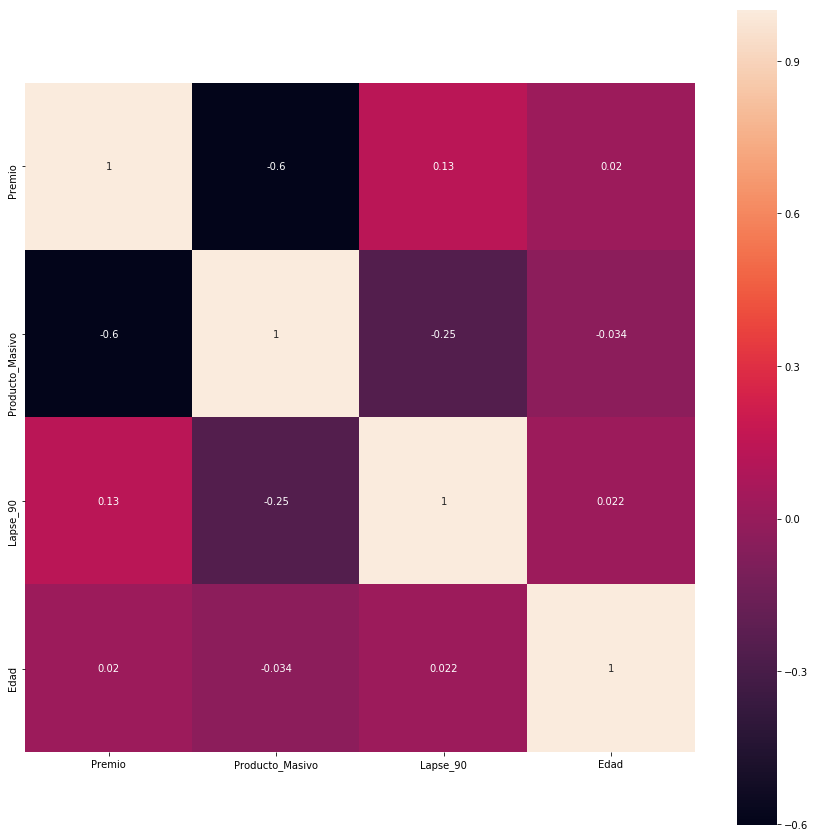

In [24]:
#Graficamos la matriz de correlacion
fig, ax = plt.subplots(figsize=(15,15))       
sns.heatmap(df.corr() , square=True, annot=True, ax=ax);

Notamos una fuerte correlacion negativa entre Premio y Producto Masivo. Esto es logico, ya que estos ultimos suelen tener premios muy bajos.

# Modelado

### Creamos variables dummies para todas las variables categoricas

In [25]:
#Producto
df = pd.concat([df, pd.get_dummies(data = df['Producto'], prefix= 'prod', drop_first=True)], axis = 1)

#Ramo
df = pd.concat([df, pd.get_dummies(data = df['Ramo'], prefix= 'ramo', drop_first=True)], axis = 1)

#Sexo
df = pd.concat([df, pd.get_dummies(data = df['Sexo'], prefix= 'sex', drop_first=True)], axis = 1)

#Provincia
df = pd.concat([df, pd.get_dummies(data = df['Provincia'], prefix= 'prov', drop_first=True)], axis = 1)

#Medio_Venta
df = pd.concat([df, pd.get_dummies(data = df['Medio_Venta'], prefix= 'mvta', drop_first=True)], axis = 1)

#Punto_Venta
df = pd.concat([df, pd.get_dummies(data = df['Punto_Venta'], prefix= 'ptovta', drop_first=True)], axis = 1)

#Puesto_Venta
df = pd.concat([df, pd.get_dummies(data = df['Puesto_Venta'], prefix= 'pstovta', drop_first=True)], axis = 1)

#Rentabilidad
df = pd.concat([df, pd.get_dummies(data = df['Rentabilidad'], prefix= 'rtb', drop_first=True)], axis = 1)

#Segmento
df = pd.concat([df, pd.get_dummies(data = df['Segmento'], prefix= 'segm', drop_first=True)], axis = 1)

In [26]:
#Dropeamos las columnas originales

df = df.drop(columns=['Producto', 'Ramo', 'Sexo','Provincia','Medio_Venta','Punto_Venta','Puesto_Venta','Rentabilidad','Segmento'])

In [27]:
df.head()

,Premio,Producto_Masivo,Lapse_90,Edad,prod_AP Autonomos Naranja,prod_AP Capital Uni. Amer. Assist,prod_AP Capital Uniforme - Sin Serv,prod_AP c Inv Kiosco Naranja,prod_ATM Plus,prod_Acc Pers Tarjetas con Cl Ajus,...,rtb_Q6,segm_Debitador,segm_Debitador Con Financ.,segm_Esporadico,segm_Esporádico,segm_Mixto,segm_Mixto Con Financ.Z,segm_Sin Segmento,segm_Tx Con Financ.,segm_Tx Sin Financ.
Solicitud_Contrato,,,,,,,,,,,,,,,,,,,,,
232-405557-2407376,30.81,1,0,34.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
301-100618-390797,36.03,1,0,30.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304-100723-73514,62.00,0,0,40.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232-405557-2355690,37.19,1,0,52.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
232-405557-1165633,36.04,1,0,34.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [28]:
df.shape

(299549, 120)

#### Importamos las librerias necesarias para el modelado

In [29]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Naive Bayes
Vamos a utilizar un modelo Naive Bayes como un benchmark y tener un punto de partida del cual poder mejorar

In [30]:
#Separamos el dataset en matriz de features y variable objetivo

X =  df.drop(['Lapse_90'], axis = 1)
y = df['Lapse_90']

In [31]:
print(X.shape, y.shape)

(299549, 119) (299549,)


In [32]:
# Separamos nuestro dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#### Estandarizacion

In [33]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [34]:
#Chequeamos la media y el desvio
print('media:',np.mean(X_train[:,1]))
print('desvio:',np.std(X_train[:,1]))

media: -3.852208670645114e-17
desvio: 1.0


In [35]:
from sklearn.naive_bayes import GaussianNB
modelo_NB = GaussianNB()
modelo_NB.fit(X_train, y_train)

GaussianNB(priors=None)

In [36]:
#Estandarizamos el set de testeo con lo que aprendio el Scaler
X_test = scaler.transform(X_test)
# Predicción
labels_predichas = modelo_NB.predict(X_test)

In [37]:
#Analizamos la performance del modelo
from sklearn.metrics import confusion_matrix
% matplotlib inline

In [38]:
# Primero calculamos el accuracy general del modelo
from sklearn.metrics import accuracy_score
accuracy_NB = accuracy_score(y_test, labels_predichas)
accuracy_score(y_test, labels_predichas)

0.8259801303279564

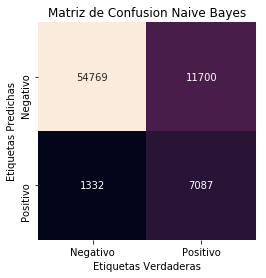

In [39]:
# Ahora calculamos la matriz de confusión
mat = confusion_matrix(y_test, labels_predichas)

ax = plt.axes()

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], ax=ax)

ax.set_title('Matriz de Confusion Naive Bayes')

plt.xlabel('Etiquetas Verdaderas')
plt.ylabel('Etiquetas Predichas');

## Conclusion

El modelo de Naive Bayes arrojo una accuracy de 82%. Este es el resultado que vamos a querer mejorar mediante la aplicacion de otros modelos de clasificacion.
Analicemos entonces las metricas de recall y precision para ver si el modelo esta teniendo muchos falsos positivos o falsos negativos

In [40]:
#Separamos los verdaderos positivos y negativos, de los falsos positivos y negativos

TP = mat[1, 1]
TN = mat[0, 0]
FP = mat[0, 1]
FN = mat[1, 0]

In [41]:
#Classification Error
class_error_NB = (1 - accuracy_NB)
class_error_NB

0.17401986967204364

In [42]:
#Recall
from sklearn.metrics import recall_score

recall_NB = recall_score(y_test, labels_predichas)
recall_NB

0.37722893490179377

In [43]:
#Specificity
specificity_NB = TN / (TN + FP)
specificity_NB

0.97625710771644

In [44]:
#Precision
from sklearn.metrics import precision_score

precision_NB = precision_score(y_test, labels_predichas)
precision_NB

0.8417864354436394

In [45]:
#F1 Score
from sklearn.metrics import f1_score

f1_NB = f1_score(y_test, labels_predichas)
f1_NB

0.5209880173491142

In [46]:
#Creamos un diccionario para despues poder comparar las metricas de todos los modelos

dict_Naive_Bayes = {'Modelo': 'Naive Bayes',
                    'Accuracy': accuracy_NB,
                    'Classification Error': class_error_NB,
                    'Recall': recall_NB,
                    'Specificity': specificity_NB,
                    'Precision': precision_NB,
                    'F1 Score': f1_NB,
                    'Tiempo de Entrenamiento (m)': 0.01
                   }

In [47]:
dict_Naive_Bayes

{'Modelo': 'Naive Bayes',
 'Accuracy': 0.8259801303279564,
 'Classification Error': 0.17401986967204364,
 'Recall': 0.37722893490179377,
 'Specificity': 0.97625710771644,
 'Precision': 0.8417864354436394,
 'F1 Score': 0.5209880173491142,
 'Tiempo de Entrenamiento (m)': 0.01}

Vemos que el modelo es muy especifico y tiene un recall relativamente bajo. Esta ultima metrica nos interesa que sea alta, ya que queremos minimizar el porcentaje de falsos negativos. Es preferible realizar una accion sobre un cliente que creemos que se va a caer, pero al final no lo hace, que no realizar una accion sobre uno que si se cae.

### Regresion Logistica

Vamos a probar un modelo de regresion logistica con cross-validation. Vamos a probar con una lista de valores posibles del hiperparametro C y 5 folds

## Recordemos que las features ya quedaron estandarizadas anteriormente

In [48]:
%%time
from sklearn import linear_model

from sklearn.model_selection import cross_val_score

# Voy a querer graficar los distintos valores del score de cross validation en función del hiperparámetro C
# Para esto voy a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame

#Lista de Diccionarios
scores_para_df = []

# Defino algunos valores para C
C_tunning = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for i in C_tunning:
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    lg = linear_model.LogisticRegression(C=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
    cv_scores = cross_val_score(lg, X_train, y_train, cv=5)
    
    # Para cada valor de C, creo un diccionario con el valor de C y la media y el desvío de los scores.
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'C':i}
    
    # Guardo cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

Wall time: 12min 35s


In [49]:
# Pasamos el diccionario de scores a un dataframe para verlo mas comodamente
scores = pd.DataFrame(scores_para_df)
scores

,C,score_medio,score_std
0,0.001,0.855347,0.000466
1,0.010,0.858467,0.000715
2,0.100,0.859562,0.000760
3,1.000,0.859798,0.000775
4,10.000,0.859802,0.000787
5,100.000,0.859802,0.000787
6,1000.000,0.859802,0.000787


In [50]:
# Que C es el que maximiza el score??
scores[scores['score_medio']==scores['score_medio'].max()]

,C,score_medio,score_std
4,10.0,0.859802,0.000787
5,100.0,0.859802,0.000787
6,1000.0,0.859802,0.000787


In [51]:
#Re-entrenamos el modelo, con todo el dataset, con el mejor hiperparametro

#Instanciamos el modelo
lg_final = linear_model.LogisticRegression(C=10)

#Fiteamos
lg_final.fit(X_train, y_train)

#Prediccion sobre test
y_pred_lg_test = lg_final.predict(X_test)

In [52]:
# Calculamos el accuracy
accuracy_LG = accuracy_score(y_test, y_pred_lg_test)
accuracy_score(y_test, y_pred_lg_test)

0.8569997863476124

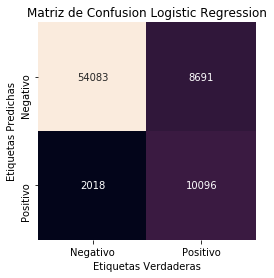

In [53]:
# Matriz de confusión:
mat_lg = confusion_matrix(y_test, y_pred_lg_test)

ax = plt.axes()

sns.heatmap(mat_lg.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], ax=ax)

ax.set_title('Matriz de Confusion Logistic Regression')

plt.xlabel('Etiquetas Verdaderas')
plt.ylabel('Etiquetas Predichas');

## Calculamos el resto de las metricas del modelo

In [54]:
#Separamos los verdaderos positivos y negativos, de los falsos positivos y negativos

TP = mat_lg[1, 1]
TN = mat_lg[0, 0]
FP = mat_lg[0, 1]
FN = mat_lg[1, 0]

#Classification Error
class_error_LG = (1 - accuracy_LG)
#Recall
recall_LG = recall_score(y_test, y_pred_lg_test)
#Specificity
specificity_LG = TN / (TN + FP)
#Precision
precision_LG = precision_score(y_test, y_pred_lg_test)
#F1 Score
f1_LG = f1_score(y_test, y_pred_lg_test)

In [55]:
#Creamos un diccionario para despues poder comparar las metricas de todos los modelos

dict_Logistic = {  'Modelo': 'Regresion Logistica',
                    'Accuracy': accuracy_LG,
                    'Classification Error': class_error_LG,
                    'Recall': recall_LG,
                    'Specificity': specificity_LG,
                    'Precision': precision_LG,
                    'F1 Score': f1_LG,
                    'Tiempo de Entrenamiento (m)': 11
                 }

In [56]:
dict_Logistic

{'Modelo': 'Regresion Logistica',
 'Accuracy': 0.8569997863476124,
 'Classification Error': 0.14300021365238758,
 'Recall': 0.5373928780539735,
 'Specificity': 0.9640291616905224,
 'Precision': 0.8334158824500578,
 'F1 Score': 0.6534416361930034,
 'Tiempo de Entrenamiento (m)': 11}

### KNN

In [58]:
%%time
from sklearn.neighbors import KNeighborsClassifier

# Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame con los valores del
# hiperparametro K que vamos a probar

#Lista de Diccionarios
KNN_scores_para_df = []

# range(1,100,10) son los posibles valores de n_neighbors que quiero explorar. Son todos los enteros desde el 1
# hasta el 100 en saltos de a 10. (Start,Stop,Step)
for i in range(1,100,10):
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
    KNN_cv_scores = cross_val_score(KNN_model, X_train, y_train, cv=5)
    
    # Para cada valor de n_neighbours, creo un diccionario con el valor de n_neighbours y la media y el desvío de los scores.
    KNN_dict_row_score = {'score_medio':np.mean(KNN_cv_scores),'score_std':np.std(KNN_cv_scores),'n_neighbours':i}
    
    # Guardo cada uno en la lista de diccionarios
    KNN_scores_para_df.append(KNN_dict_row_score)

Wall time: 16h 59min 19s


In [60]:
# Creamos el DataFrame a partir de la lista de diccionarios
scores_KNN = pd.DataFrame(KNN_scores_para_df)
scores_KNN

,n_neighbours,score_medio,score_std
0,1,0.857216,0.000700
1,11,0.858698,0.001475
2,21,0.855186,0.000463
3,31,0.853441,0.000481
4,41,0.850971,0.000636
5,51,0.849391,0.000288
6,61,0.848109,0.000617
7,71,0.847050,0.000609
8,81,0.846084,0.001025
9,91,0.844708,0.001119


In [61]:
# Que cantidad de K vecinos es el que maximiza el score??
scores_KNN[scores_KNN['score_medio']==scores_KNN['score_medio'].max()]

,n_neighbours,score_medio,score_std
1,11,0.858698,0.001475


In [62]:
#Re-entrenamos el modelo, con todo el dataset, con el mejor hiperparametro

#Instanciamos el modelo
KNN_final = KNeighborsClassifier(n_neighbors = 11)

#Fiteamos
KNN_final.fit(X_train, y_train)

#Prediccion sobre test
y_pred_KNN_test = KNN_final.predict(X_test)

In [63]:
# Calculamos el accuracy
accuracy_KNN = accuracy_score(y_test, y_pred_KNN_test)
accuracy_score(y_test, y_pred_KNN_test)

0.8605918171135563

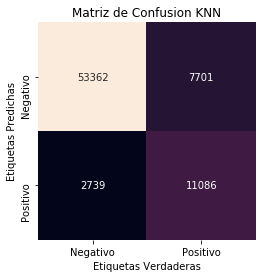

In [109]:
# Matriz de confusión:
mat_KNN = confusion_matrix(y_test, y_pred_KNN_test)

ax = plt.axes()

sns.heatmap(mat_KNN.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], ax=ax)

ax.set_title('Matriz de Confusion KNN')
plt.xlabel('Etiquetas Verdaderas')
plt.ylabel('Etiquetas Predichas');

## Calculamos el resto de las metricas del modelo

In [65]:
#Separamos los verdaderos positivos y negativos, de los falsos positivos y negativos

TP = mat_KNN[1, 1]
TN = mat_KNN[0, 0]
FP = mat_KNN[0, 1]
FN = mat_KNN[1, 0]

#Classification Error
class_error_KNN = (1 - accuracy_KNN)
#Recall
recall_KNN = recall_score(y_test, y_pred_KNN_test)
#Specificity
specificity_KNN = TN / (TN + FP)
#Precision
precision_KNN = precision_score(y_test, y_pred_KNN_test)
#F1 Score
f1_KNN = f1_score(y_test, y_pred_KNN_test)

In [66]:
#Creamos un diccionario para despues poder comparar las metricas de todos los modelos

dict_KNN =         {'Modelo': 'KNN',
                    'Accuracy': accuracy_KNN,
                    'Classification Error': class_error_KNN,
                    'Recall': recall_KNN,
                    'Specificity': specificity_KNN,
                    'Precision': precision_KNN,
                    'F1 Score': f1_KNN,
                    'Tiempo de Entrenamiento (m)': 1020
                 }

In [67]:
dict_KNN

{'Modelo': 'KNN',
 'Accuracy': 0.8605918171135563,
 'Classification Error': 0.13940818288644374,
 'Recall': 0.590088891254591,
 'Specificity': 0.9511773408673642,
 'Precision': 0.8018806509945751,
 'F1 Score': 0.679872439592788,
 'Tiempo de Entrenamiento (m)': 1020}

### CatBoost

CatBoost es un algoritmo de Gradient Boosting, que requiere que todos los datos sean del tipo string o integer. Por lo cual vamos a tener que transformar la variable de premio en integer

In [57]:
# Modificamos la columna de premio
df_catboost = df
df_catboost['Premio'] = df_catboost['Premio'].astype(int)

In [58]:
#Separamos el dataset en matriz de features y variable objetivo

X_cb =  df_catboost.drop(['Lapse_90'], axis = 1)
y_cb = df_catboost['Lapse_90']

In [59]:
# Inicializo mis sets de testeo y training
train_set, test_set, train_label, test_label = train_test_split(X_cb, y_cb, test_size=0.25, random_state=1)

In [60]:
from catboost import CatBoostClassifier
# Instanciamos el modelo con los hiperparametros
modelo_catboost = CatBoostClassifier(l2_leaf_reg = 3,iterations=2, depth=2, learning_rate=1, loss_function='Logloss', logging_level='Verbose')

In [61]:
%%time
#Entrenamos el modelo
modelo_catboost.fit(train_set, train_label, cat_features=[0,2,5])

0:	learn: 0.4743655	total: 135ms	remaining: 135ms
1:	learn: 0.2832936	total: 227ms	remaining: 0us
Wall time: 3.62 s


### Probamos el modelo sobre el set de testeo

In [63]:
#Predecimos las etiquetas del set de testeo
preds_class = modelo_catboost.predict(test_set)
preds_proba = modelo_catboost.predict_proba(test_set)
print("class = ", preds_class)
print("proba = ", preds_proba)

class =  [0. 1. 0. ... 1. 0. 0.]
proba =  [[0.97111091 0.02888909]
 [0.29423459 0.70576541]
 [0.61590438 0.38409562]
 ...
 [0.29423459 0.70576541]
 [0.97111091 0.02888909]
 [0.97111091 0.02888909]]


In [64]:
#Score del modelo en el set de entrenamiento
modelo_catboost.score(train_set, train_label)

0.8871855818321827

In [65]:
#Score del modelo en el set de testeo
accuracy_CAT = modelo_catboost.score(test_set, test_label)
modelo_catboost.score(test_set, test_label)

0.8865772887512018

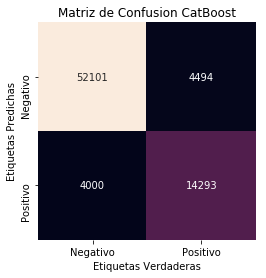

In [66]:
# Matriz de confusión:
mat_cat = confusion_matrix(test_label, preds_class)

ax = plt.axes()

sns.heatmap(mat_cat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'],
           ax=ax)
ax.set_title('Matriz de Confusion CatBoost')
plt.xlabel('Etiquetas Verdaderas')
plt.ylabel('Etiquetas Predichas');

In [67]:
#Separamos los verdaderos positivos y negativos, de los falsos positivos y negativos

TP = mat_cat[1, 1]
TN = mat_cat[0, 0]
FP = mat_cat[0, 1]
FN = mat_cat[1, 0]

#Classification Error
class_error_CAT = (1 - accuracy_CAT)
#Recall
recall_CAT = recall_score(test_label, preds_class)
#Specificity
specificity_CAT = TN / (TN + FP)
#Precision
precision_CAT = precision_score(test_label, preds_class)
#F1 Score
f1_CAT = f1_score(test_label, preds_class)

In [68]:
#Creamos un diccionario para despues poder comparar las metricas de todos los modelos

dict_CatBoost = {  'Modelo': 'CatBoost',
                    'Accuracy': accuracy_CAT,
                    'Classification Error': class_error_CAT,
                    'Recall': recall_CAT,
                    'Specificity': specificity_CAT,
                    'Precision': precision_CAT,
                    'F1 Score': f1_CAT,
                    'Tiempo de Entrenamiento (m)': 0.067
                 }

In [69]:
dict_CatBoost

{'Modelo': 'CatBoost',
 'Accuracy': 0.8865772887512018,
 'Classification Error': 0.11342271124879821,
 'Recall': 0.7607920370468941,
 'Specificity': 0.9287000231724925,
 'Precision': 0.7813371234898595,
 'F1 Score': 0.7709277238403451,
 'Tiempo de Entrenamiento (m)': 0.067}

# Comparacion de resultados

In [99]:
#Juntamos todos los diccionarios en un dataframe
diccionarios = [dict_Naive_Bayes,dict_Logistic,dict_KNN,dict_CatBoost]
resultados = pd.DataFrame(diccionarios)

#Reordenamos las columnas
resultados = resultados[['Modelo','Accuracy','Classification Error','Recall','Specificity','Precision','F1 Score','Tiempo de Entrenamiento (m)']]


In [100]:
resultados

,Modelo,Accuracy,Classification Error,Recall,Specificity,Precision,F1 Score,Tiempo de Entrenamiento (m)
0,Naive Bayes,0.825192,0.174808,0.383829,0.972995,0.826381,0.524189,0.010
1,Regresion Logistica,0.856920,0.143080,0.537233,0.963976,0.833168,0.653247,11.000
2,KNN,0.860592,0.139408,0.590089,0.951177,0.801881,0.679872,1020.000
3,CatBoost,0.886577,0.113423,0.760792,0.928700,0.781337,0.770928,0.067


In [103]:
res_trans = resultados.set_index(resultados['Modelo'])
res_trans.T

Modelo,Naive Bayes,Regresion Logistica,KNN,CatBoost
Modelo,Naive Bayes,Regresion Logistica,KNN,CatBoost
Accuracy,0.825192,0.85692,0.860592,0.886577
Classification Error,0.174808,0.14308,0.139408,0.113423
Recall,0.383829,0.537233,0.590089,0.760792
Specificity,0.972995,0.963976,0.951177,0.9287
Precision,0.826381,0.833168,0.801881,0.781337
F1 Score,0.524189,0.653247,0.679872,0.770928
Tiempo de Entrenamiento (m),0.01,11,1020,0.067


### Curvas ROC

In [115]:
from sklearn.metrics import roc_curve, auc

In [113]:
#Calculo de probabilidades

y_probs_nb = modelo_NB.predict_proba(X_test)
y_probs_LG = lg_final.predict_proba(X_test)
y_probs_KNN = KNN_final.predict_proba(X_test)
y_probs_CAT = modelo_catboost.predict_proba(test_set)

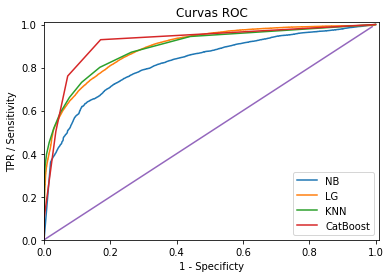

In [117]:
#Curvas ROC
##NB
fpr_nb,tpr_nb,thr_nb = roc_curve(y_test, y_probs_nb[:,1])
##LG
fpr_lg,tpr_lg,thr_lg = roc_curve(y_test, y_probs_LG[:,1])
##KNN
fpr_knn,tpr_knn,thr_knn = roc_curve(y_test, y_probs_KNN[:,1])
##CatBoost
fpr_cat,tpr_cat,thr_cat = roc_curve(test_label, y_probs_CAT[:,1])

#Rango de los ejes
plt.axis([0, 1.01, 0, 1.01])

#Etiquetas de los ejes
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')

#Titulo
plt.title('Curvas ROC')

#Plot de las curvas
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_lg,tpr_lg)
plt.plot(fpr_knn,tpr_knn)
plt.plot(fpr_cat,tpr_cat)

#Recta
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))

#Leyenda
plt.legend(['NB','LG','KNN','CatBoost'])
plt.show() 

### AUC de los modelos

In [118]:
print('AUC NB=', auc(fpr_nb, tpr_nb))
print('AUC LG=', auc(fpr_lg, tpr_lg))
print('AUC KNN=', auc(fpr_knn, tpr_knn))
print('AUC CatBoost=', auc(fpr_cat, tpr_cat))

AUC NB= 0.8242559060915204
AUC LG= 0.8934726376001814
AUC KNN= 0.8926932260421311
AUC CatBoost= 0.9173675342842253


In [119]:
AUC_NB=auc(fpr_nb, tpr_nb)
AUC_LG=auc(fpr_lg, tpr_lg)
AUC_KNN=auc(fpr_knn, tpr_knn)
AUC_CatBoost=auc(fpr_cat, tpr_cat)

In [120]:
#Agregamos los resultados al dataframe

resultados['AUC'] = [AUC_NB, AUC_LG, AUC_KNN, AUC_CatBoost]

In [121]:
resultados

,Modelo,Accuracy,Classification Error,Recall,Specificity,Precision,F1 Score,Tiempo de Entrenamiento (m),AUC
0,Naive Bayes,0.825192,0.174808,0.383829,0.972995,0.826381,0.524189,0.010,0.824256
1,Regresion Logistica,0.856920,0.143080,0.537233,0.963976,0.833168,0.653247,11.000,0.893473
2,KNN,0.860592,0.139408,0.590089,0.951177,0.801881,0.679872,1020.000,0.892693
3,CatBoost,0.886577,0.113423,0.760792,0.928700,0.781337,0.770928,0.067,0.917368


In [122]:
#Guardamos los resultados en un archivo
resultados.to_csv('C:/Users/Ramiro/Desktop/Digital House/Desafios/Desafio 3/Resultados.csv')

# Graficos comparativos

In [19]:
### Comparacion de las metricas de todos los modelos

## Naive Bayes como baseline
trace1 = go.Bar(
    x=['Accuracy', 'Recall', 'Precission', 'F1 Score'],
    y=[resultados['Accuracy'][0], resultados['Recall'][0], resultados['Precision'][0], resultados['F1 Score'][0]],
    name='Naive Bayes'
)


## Regresion logistica
trace2 = go.Bar(
    x=['Accuracy', 'Recall', 'Precission', 'F1 Score'],
    y=[resultados['Accuracy'][1], resultados['Recall'][1], resultados['Precision'][1], resultados['F1 Score'][1]],
    name='Logistic Regression'
)


## KNN
trace3 = go.Bar(
    x=['Accuracy', 'Recall', 'Precission', 'F1 Score'],
    y=[resultados['Accuracy'][2], resultados['Recall'][2], resultados['Precision'][2], resultados['F1 Score'][2]],
    name='KNN'
)


## CatBoost
trace4 = go.Bar(
    x=['Accuracy', 'Recall', 'Precission', 'F1 Score'],
    y=[resultados['Accuracy'][3], resultados['Recall'][3], resultados['Precision'][3], resultados['F1 Score'][3]],
    name='CatBoost'
)


data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    barmode='group',
    title = 'Comparacion de Metricas'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

# Conclusiones

Para nuestro problema en particular no solo es importante un accuracy alto, sino que tambien nos interesa minimizar los falsos negativos. Es mucho mas costoso para la compañia no realizar una accion sobre un cliente que va a entrar en default y perder esa poliza, que "molestar" a un cliente que finalmente no entrara en default (falso positivo). Es por esto que tambien nos interesa que el modelo tenga una metrica recall alta, de manera que minimice esos casos.

La familia de algoritmos de gradient boosting (Light GBM, CatBoost XGBoost) funcionan particularmente bien para este tipo de problemas, y en este caso, que no se evaluo el modelo con cross-validation, presentan un tiempo de entrenamiento bastante aceptable (sobretodo comparado con KNN que es altamente exigente sobre los recursos).

En conclusion, la mejor alternativa para la solucion de este tipo de problemas es algun algoritmo de gradient boosting, en este caso seleccionaremos CatBoost. En siguientes iteraciones, tunearemos los hiperparametros mediante GridSerach o RandomSearch para poder acercanos aun a una mejor prediccion.